# Import

In [769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Load

In [770]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [771]:
duplicated = diabetes[diabetes.duplicated()]
duplicated

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [772]:
# pregnant, outcome, DiabetesPedigreeFunction을 제외한 0은 의미 없는 데이터로 간주, nan으로 replace
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
for col in columns:
    diabetes[col] = diabetes[col].replace(0, np.nan)

In [773]:
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


# Visualization

In [774]:
# 0. class distribution
class_yes = diabetes[diabetes['Outcome'] == 0].values
class_no = diabetes[diabetes['Outcome'] == 1].values

print(f"class_yes: {len(class_yes)}")
print(f"class_no: {len(class_no)}")

class_yes: 500
class_no: 268


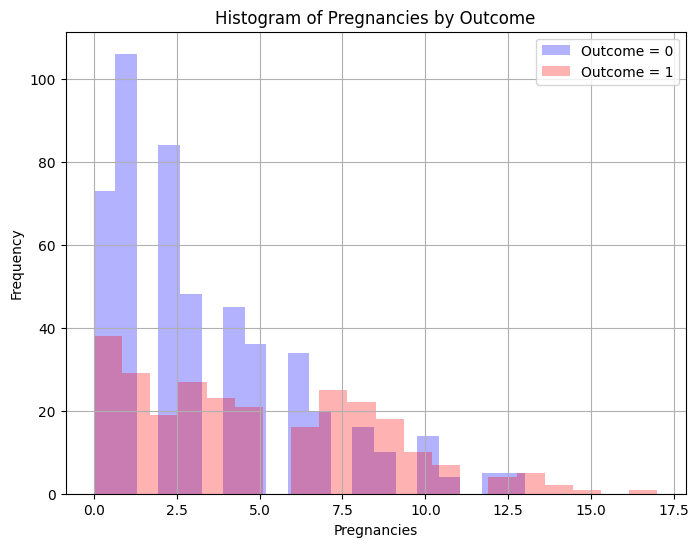

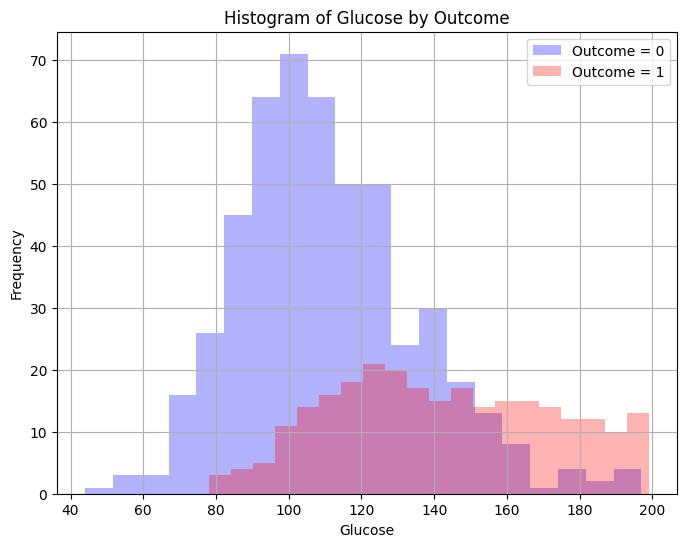

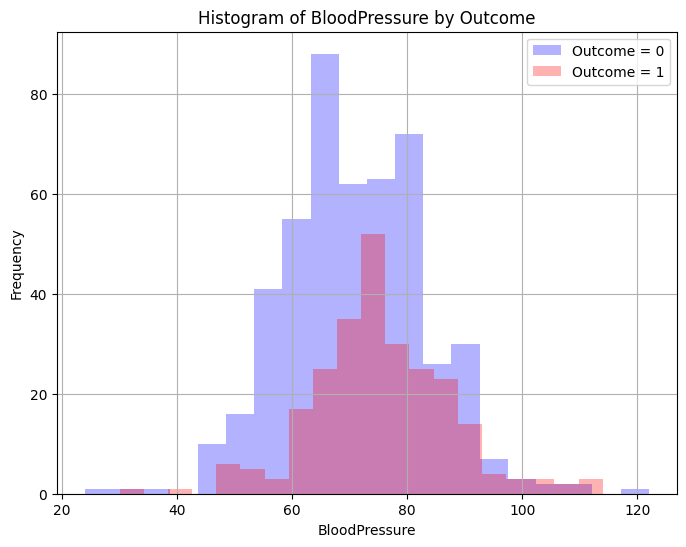

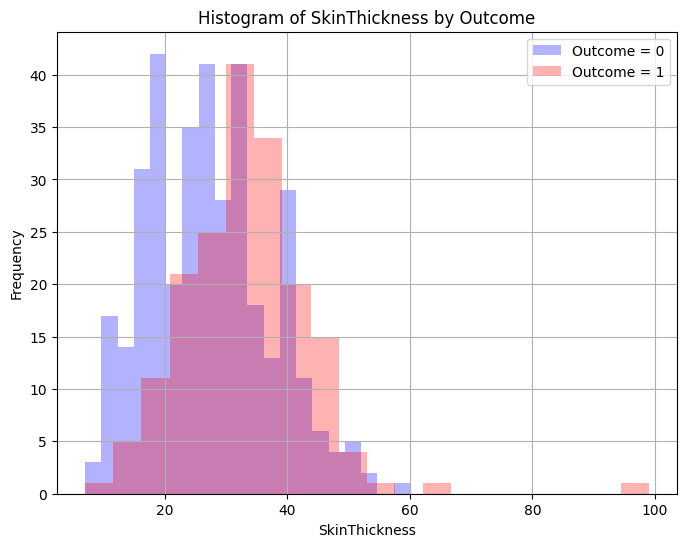

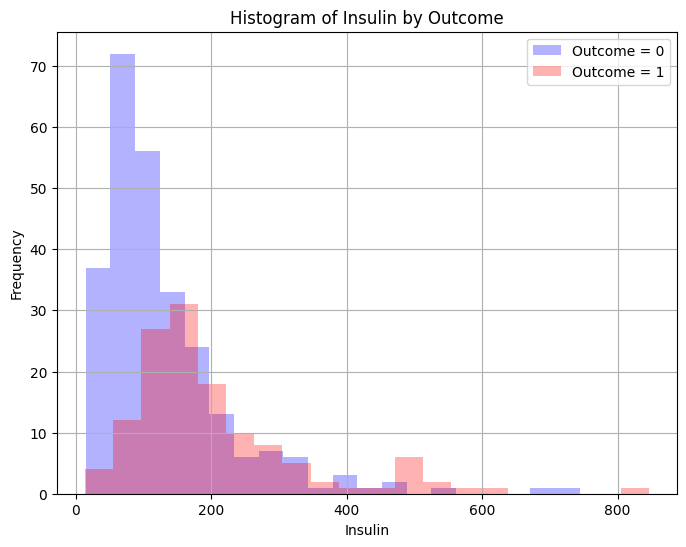

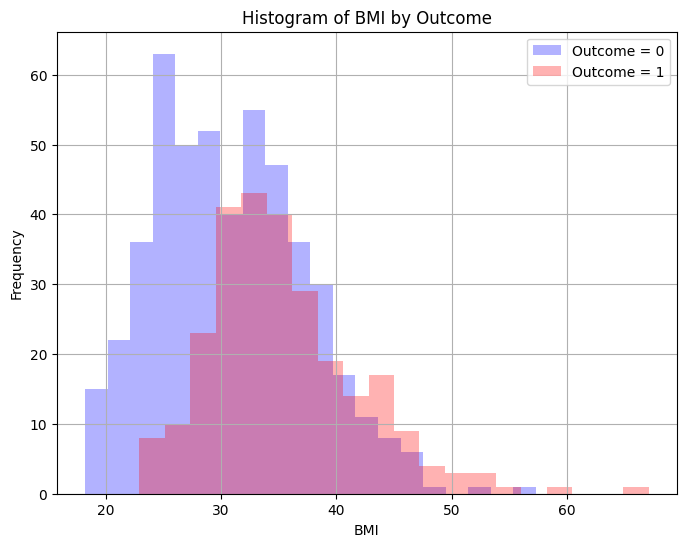

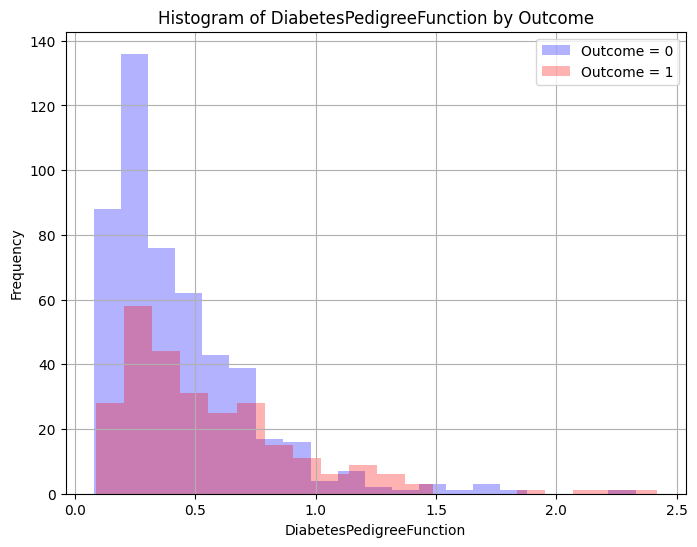

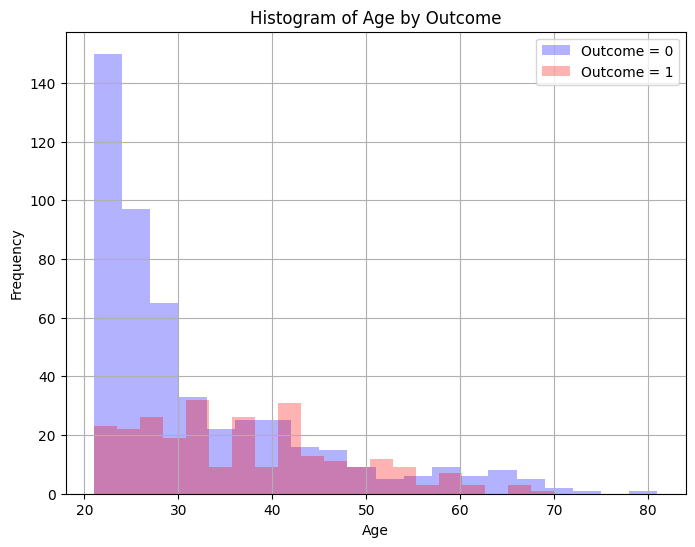

In [775]:
# historgram

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for var in variables:
    plt.figure(figsize = (8, 6))

    plt.hist(diabetes[var][diabetes['Outcome'] == 0], bins = 20, alpha = 0.3, color = 'blue', label = 'Outcome = 0')
    plt.hist(diabetes[var][diabetes['Outcome'] == 1], bins = 20, alpha = 0.3, color = 'red', label = 'Outcome = 1')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Histogram of {} by Outcome'.format(var))
    plt.legend(loc = 'upper right')
    plt.grid(True)
    plt.show()

In [776]:
# bar chart
def bar_chart(feature, criterion):
    yes_ratio = {}
    no_ratio = {}
    cutoff = criterion # medically defined normal value
    bp_categorical = np.where(diabetes[feature].values < criterion, f'v < {cutoff}', f'v >= {cutoff}')
    categories, counts = np.unique(bp_categorical, return_counts = True) # 범주의 개수, 각 범주에 속하는 데이터 수 리스트

    categories = list(categories)
    counts = list(counts)

    print(f"low data = {counts[0]}")
    print(f"high_data = {counts[1]}")

    low_column = diabetes[diabetes[feature] < cutoff]
    high_column = diabetes[diabetes[feature] >= cutoff]

    print(f"low column = {len(low_column)}")
    print(f"high column = {len(high_column)}")

    low_column_yes = low_column[low_column['Outcome'] == 1]
    low_column_no = low_column[low_column['Outcome'] == 0]

    yes_ratio[f'v < {cutoff}'] = len(low_column_yes) / counts[0]
    no_ratio[f'v < {cutoff}'] = len(low_column_no) / counts[0]

    high_column_yes = high_column[high_column['Outcome'] == 1]
    high_column_no = high_column[high_column['Outcome'] == 0]

    yes_ratio[f'v >= {cutoff}'] = len(high_column_yes) / counts[1]
    no_ratio[f'v >= {cutoff}'] = len(high_column_no) / counts[1]

    print(len(low_column_yes))
    print(len(low_column_no))
    print(len(high_column_yes))
    print(len(high_column_no))

    plt.figure(figsize = (10, 4))
    bar1 = plt.bar(range(len(categories)), [yes_ratio[cat] for cat in categories], width = 0.4, label = 'Yes', color = 'red', alpha = 0.3)
    bar2 = plt.bar([i + 0.4 for i in range(2)], [no_ratio[cat] for cat in categories], width = 0.4, label = 'No', color = 'blue', alpha = 0.3)

    plt.xticks([i + 0.2 for i in range(2)], categories, rotation = 'horizontal')

    for bar in bar1 :
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%.3f' % height, ha='center', va='bottom', size = 12 )
    for bar in bar2 :
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%.3f' % height, ha='center', va='bottom', size = 12 )

    plt.xlabel(feature)
    plt.ylabel('diabetes_Outcome')
    plt.title(f'diabetes_Outcome Rate by {feature}')
    plt.legend()
    plt.show()

low data = 349
high_data = 419
low column = 349
high column = 419
86
263
182
237


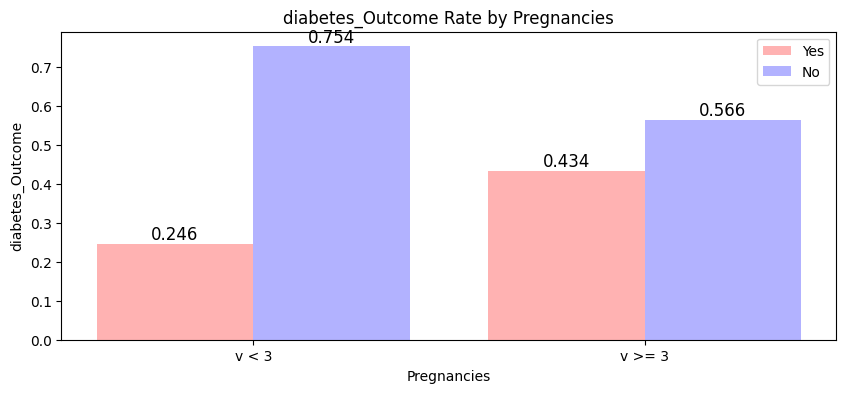

In [777]:
bar_chart('Pregnancies', 3)

low data = 466
high_data = 302
low column = 466
high column = 297
90
376
176
121


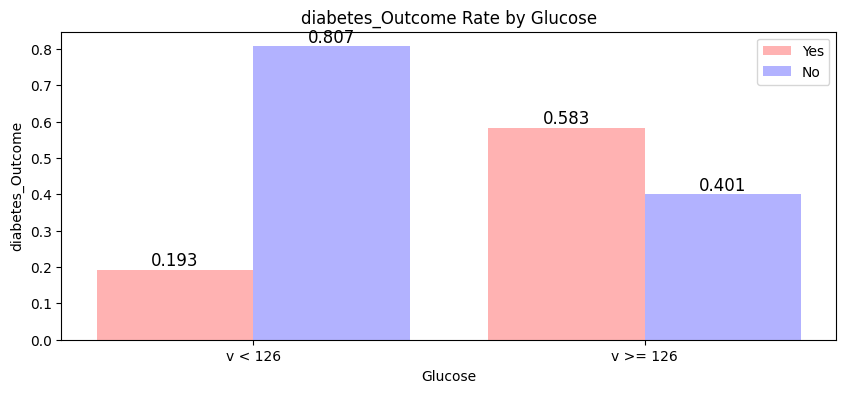

In [778]:
bar_chart('Glucose', 126)

low data = 621
high_data = 147
low column = 621
high column = 112
200
421
52
60


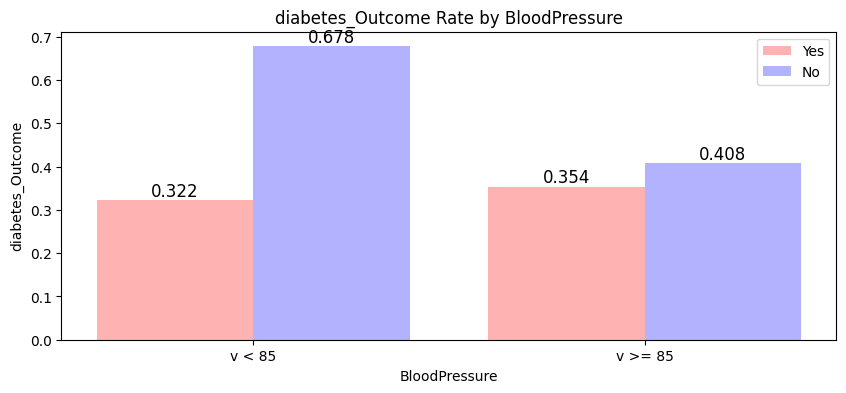

In [779]:
# bloodpressure
bar_chart('BloodPressure', 85)

low data = 322
high_data = 446
low column = 322
high column = 219
78
244
102
117


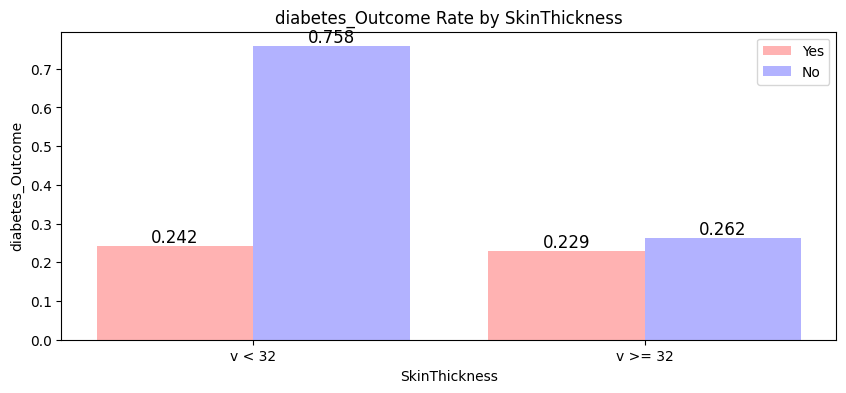

In [780]:
# skin thickness
bar_chart('SkinThickness', 32)

low data = 11
high_data = 757
low column = 11
high column = 383
2
9
128
255


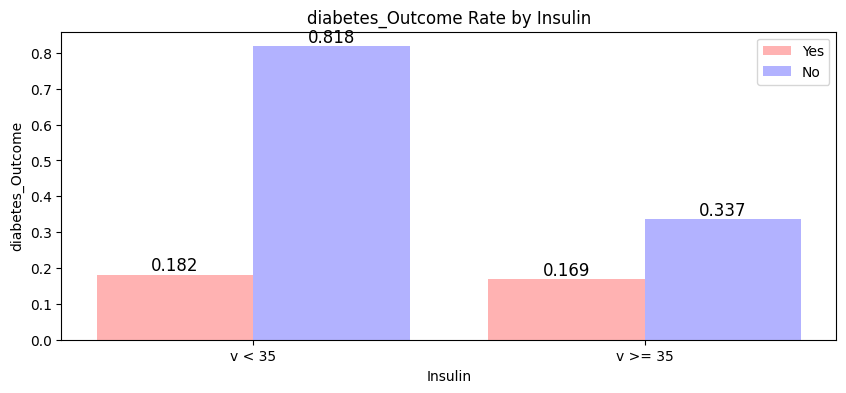

In [781]:
# Insulin - 분비가 부족하면 당뇨 발생 확률 높아짐. 
bar_chart('Insulin', 35)

low data = 106
high_data = 662
low column = 106
high column = 651
7
99
259
392


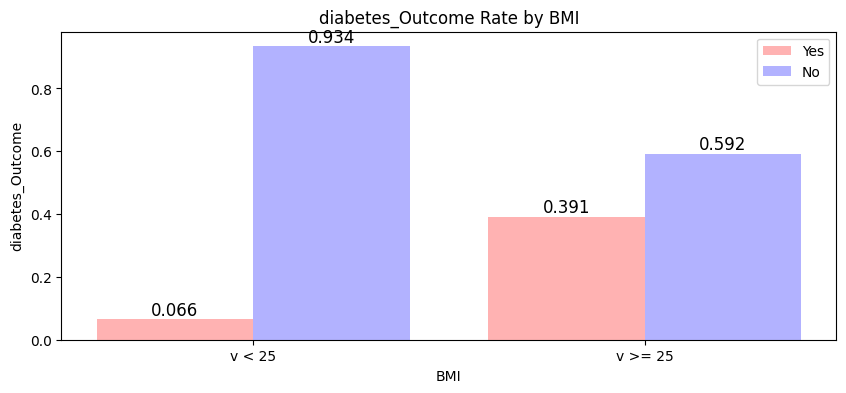

In [782]:
# BMI
bar_chart('BMI', 25)

In [783]:
# heatmap
diabetes_fixed = diabetes.drop(columns = ['Outcome'], axis = 1)
diabetes_corr = diabetes_fixed.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000


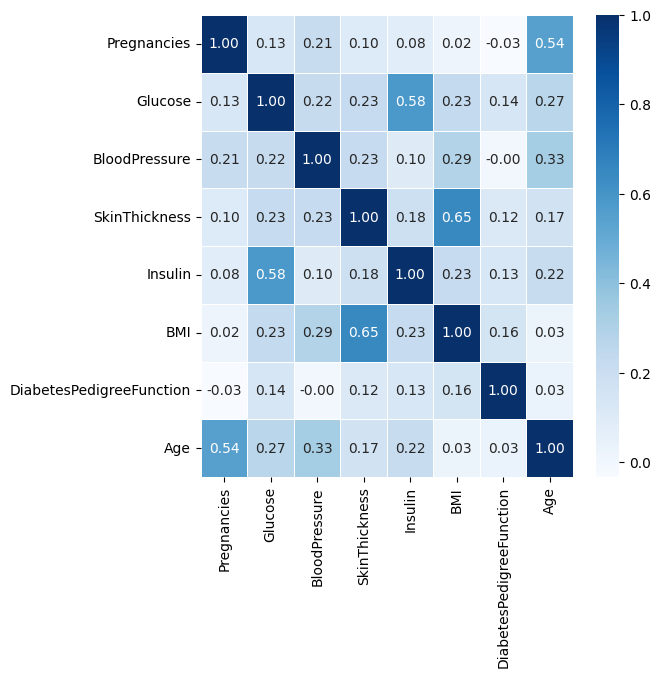

In [784]:
plt.figure(figsize = (6, 6))
diabetes_heatmap = sns.heatmap(diabetes_corr, cmap = 'Blues', annot = True, fmt = '.2f', linewidth = .5)

# Data Preprocessing

### fill NaN

In [785]:
# data distribution에 따라 nan 채워넣기 
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace = True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True)
diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace = True)

/var/folders/0z/j2n4whp57zxgjc1rwnh6p26w0000gn/T/ipykernel_5061/3008655467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
/var/folders/0z/j2n4whp57zxgjc1rwnh6p26w0000gn/T/ipykernel_5061/3008655467.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

### Remove Outliers

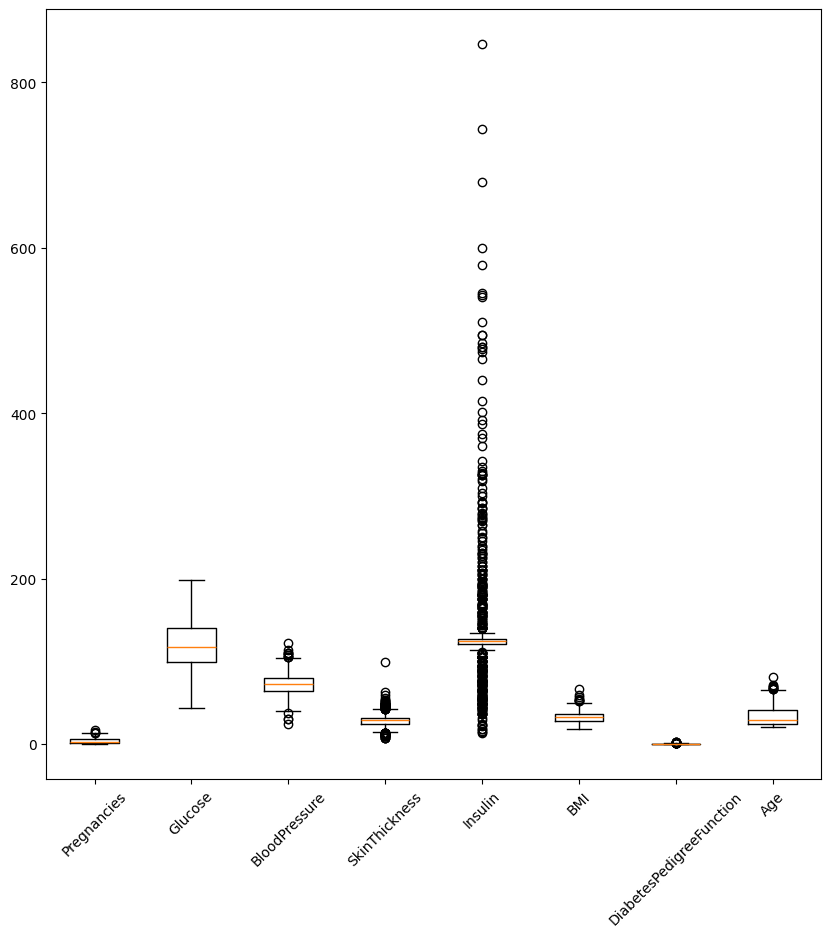

In [786]:
# check outliers through boxplots
plt.figure(figsize = (10, 10))
plt.boxplot([diabetes['Pregnancies'], diabetes['Glucose'], diabetes['BloodPressure'], diabetes['SkinThickness'], diabetes['Insulin'], diabetes['BMI'], diabetes['DiabetesPedigreeFunction'], diabetes['Age']])
plt.xticks(ticks = range(1, 9), labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], rotation = 45)
plt.show()

In [787]:
# define cleaned data with outliers removed
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for col in column:
      outlier = df.index[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
      df.loc[outlier, col] = np.nan # outlier에 해당하는 행들 중에서 col 열 선택해서 nan값으로 대체 

    return df

column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
remove_outliers(diabetes, column)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,NaN,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,NaN,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,NaN,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1


In [788]:
# replace np.nan with using knn
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)

filled_diabetes = imputer.fit_transform(diabetes)
filled_diabetes = pd.DataFrame(filled_diabetes, columns = diabetes.columns)
filled_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.6270,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.3510,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.6720,32.0,1.0
3,1.0,89.0,66.0,23.0,125.0,28.1,0.1670,21.0,0.0
4,0.0,137.0,40.0,35.0,128.0,43.1,0.5282,33.0,1.0


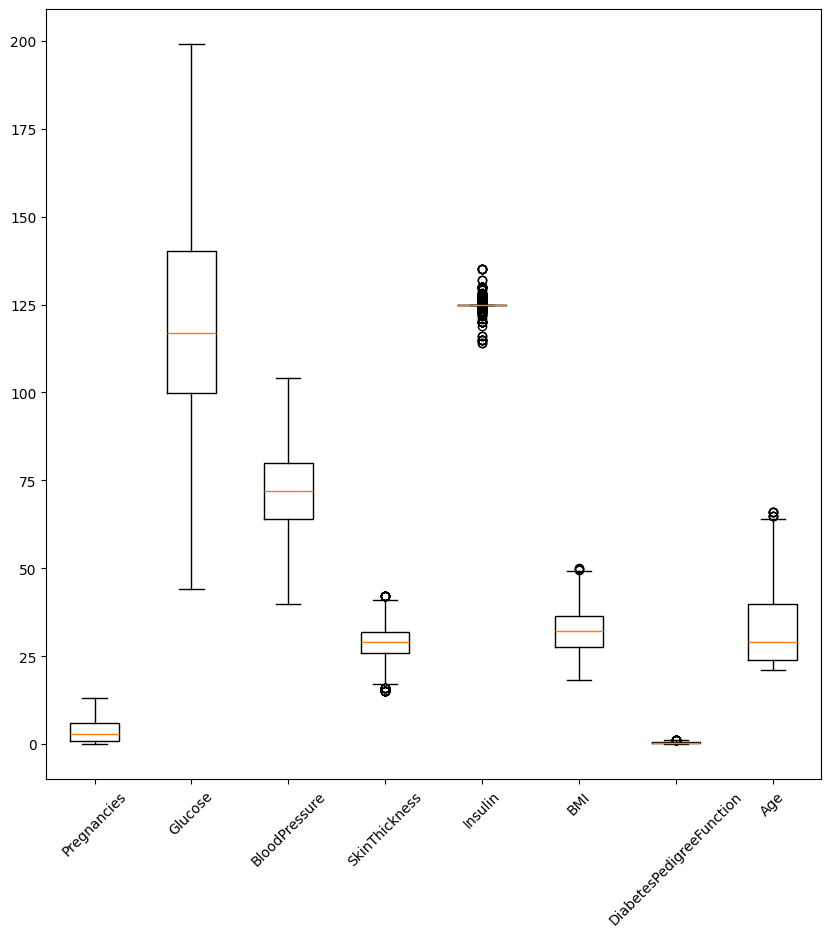

In [789]:
# check replaced outliers through boxplots
plt.figure(figsize = (10, 10))
plt.boxplot([filled_diabetes['Pregnancies'], filled_diabetes['Glucose'], filled_diabetes['BloodPressure'], filled_diabetes['SkinThickness'], filled_diabetes['Insulin'], filled_diabetes['BMI'], filled_diabetes['DiabetesPedigreeFunction'],filled_diabetes['Age']])
plt.xticks(ticks = range(1, 9), labels = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], rotation = 45)
plt.show()

In [790]:
# change type of 'Outcome' into int

filled_diabetes['Outcome'] = filled_diabetes['Outcome'].astype(int)

In [791]:
diabetes = filled_diabetes

In [792]:
print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



# Model

In [793]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

In [794]:
target = diabetes['Outcome']
data = diabetes.drop(columns = ['Outcome'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, shuffle = True, random_state = 34)

In [795]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 평균 = 0, 분산 = 1로 표준화
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

X_train.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_test.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

### LightGBM (in_unbalance = False) + Bayesian Optimization

In [797]:
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization

def train(learning_rate, max_depth, num_leaves, n_estimators, reg_alpha, reg_lambda):
  
  model = LGBMClassifier(learning_rate=learning_rate,
                        max_depth=int(max_depth),is_unbalance=False,verbose=-1,
                       num_leaves=int(num_leaves),n_estimators=int(n_estimators),
                       reg_alpha=reg_alpha,reg_lambda=reg_lambda)

  model.fit(X_train,y_train)

  y_prob = model.predict_proba(X_test)[:,1]

  # find the best threshold for maximum f1
  from sklearn.metrics import precision_recall_curve
  precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
  f1_scores = 2*recall*precision/(recall+precision)
  threshold=thresholds[np.argmax(f1_scores)]

  # if the avg P(y=1) is bigger than threshold, predict as 1, else 0
  y_pred=np.where(y_prob > threshold, 1, 0)

  # return f1 based on the prediction
  f1=f1_score(y_test, y_pred)
  return f1, y_pred, threshold # oversampling이 적용되지 않는 데이터셋에 대한 f1 score

def train_wrapper(**kwargs):
    f1, _, _ = train(**kwargs)
    return f1

pbounds = {'learning_rate': [0.0001,0.1],
           'max_depth':[10, 200],
           'n_estimators':[10, 300],
           'num_leaves':[10,100],
           'reg_alpha':[0.0,0.1],
           'reg_lambda':[0,0.1]
           }

optimizer = BayesianOptimization(
    f=train_wrapper,
    pbounds=pbounds,
    random_state=1
)

In [798]:
optimizer.maximize(
    init_points=10, 
    n_iter=10)

|   iter    |  target   | learni... | max_depth | n_esti... | num_le... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------
| 1         | 0.7414    | 0.04176   | 146.9     | 10.03     | 37.21     | 0.01468   | 0.009234  |
| 2         | 0.7333    | 0.01871   | 75.66     | 125.1     | 58.49     | 0.04192   | 0.06852   |
| 3         | 0.7193    | 0.02052   | 176.8     | 17.94     | 70.34     | 0.04173   | 0.05587   |
| 4         | 0.7049    | 0.01412   | 47.64     | 242.2     | 97.14     | 0.03134   | 0.06923   |
| 5         | 0.72      | 0.08765   | 180.0     | 34.66     | 13.51     | 0.01698   | 0.08781   |
| 6         | 0.7132    | 0.009925  | 90.01     | 287.8     | 57.98     | 0.06919   | 0.03155   |
| 7         | 0.7288    | 0.06868   | 168.6     | 15.3      | 77.51     | 0.09889   | 0.07482   |
| 8         | 0.0       | 0.02812   | 160.0     | 39.94     | 50.31     | 0.09086   | 0.02936   |
| 9         | 0.7414

/var/folders/0z/j2n4whp57zxgjc1rwnh6p26w0000gn/T/ipykernel_5061/3239228444.py:18: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2*recall*precision/(recall+precision)


| 10        | 0.704     | 0.04921   | 20.14     | 176.5     | 23.21     | 0.05893   | 0.06998   |
| 11        | 0.7       | 0.06866   | 18.17     | 178.3     | 21.72     | 0.02636   | 0.07114   |
| 12        | 0.7321    | 0.04208   | 191.0     | 15.15     | 95.71     | 0.02135   | 0.06587   |
| 13        | 0.6939    | 0.02329   | 133.5     | 11.61     | 10.33     | 0.08884   | 0.02986   |
| 14        | 0.7414    | 0.07599   | 59.05     | 12.02     | 53.32     | 0.06722   | 0.06156   |
| 15        | 0.7414    | 0.02967   | 30.14     | 15.08     | 39.79     | 0.07608   | 0.0101    |
| 16        | 0.7241    | 0.06249   | 44.99     | 42.69     | 47.99     | 0.05922   | 0.02917   |
| 17        | 0.0       | 0.09949   | 12.93     | 37.74     | 57.3      | 0.0263    | 0.08777   |
| 18        | 0.0       | 0.05173   | 51.61     | 23.27     | 30.24     | 0.02258   | 0.05135   |
| 19        | 0.0       | 0.08148   | 53.74     | 18.58     | 68.53     | 0.09724   | 0.07965   |
| 20        | 0.7414

/var/folders/0z/j2n4whp57zxgjc1rwnh6p26w0000gn/T/ipykernel_5061/3239228444.py:18: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2*recall*precision/(recall+precision)
/var/folders/0z/j2n4whp57zxgjc1rwnh6p26w0000gn/T/ipykernel_5061/3239228444.py:18: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2*recall*precision/(recall+precision)
/var/folders/0z/j2n4whp57zxgjc1rwnh6p26w0000gn/T/ipykernel_5061/3239228444.py:18: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2*recall*precision/(recall+precision)


In [799]:
# f1 score
train(learning_rate=0.0429,
      max_depth=int(177.3),
      n_estimators=int(15.54),
      num_leaves=int(86.76),
      reg_alpha= 0.04811,
      reg_lambda=0.06835)[0]

0.7413793103448276

In [800]:
train(learning_rate=0.0429,
      max_depth=int(177.3),
      n_estimators=int(15.54),
      num_leaves=int(86.76),
      reg_alpha= 0.04811,
      reg_lambda=0.06835)[2]

np.float64(0.3429234480219122)

In [801]:
model = LGBMClassifier(
    learning_rate=0.02885,
      max_depth=int(34.71),
      n_estimators=int(15.62),
      num_leaves=int(71.1),
      reg_alpha= 0.02116,
      reg_lambda=0.02655)

model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1] # class 1에 속할 확률 

# if the avg P(y=1) is bigger than threshold, predict as 1, else 0
y_pred=np.where(y_prob > 0.5509419637055514, 1, 0)
y_pred = pd.Series(y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     columns = ['Predicted No', 'Predicted Yes'],
                     index = ['Actual No', 'Actual Yes'])

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(cm_df)
print(f"f1: {f1}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"accuracy: {accuracy}")

            Predicted No  Predicted Yes
Actual No             81             24
Actual Yes             5             44
f1: 0.7521367521367521
recall: 0.8979591836734694
precision: 0.6470588235294118
accuracy: 0.8116883116883117


In [796]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

In [802]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       105
           1       0.65      0.90      0.75        49

    accuracy                           0.81       154
   macro avg       0.79      0.83      0.80       154
weighted avg       0.85      0.81      0.82       154

